In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set()

import lib.fetch as fetch
import lib.preprocess as preprocess
import lib.analysis as analysis
import lib.clustering as cluster
import lib.constructport as constructport
import lib.learn as learn

%load_ext autoreload
%autoreload 2
path="./data/"

# Building the dataset from scratch

### links to our data sources
Fetching Quandl API [link](https://blog.quandl.com/api-for-commodity-data) <br>
CHRIS index dataset [link](https://www.quandl.com/data/CHRIS-Wiki-Continuous-Futures/documentation/introduction)

### Commodity index-database - CHRIS
###### understanding the data structure hierachy
- CHRIS_metadata.csv
    - contains all 600 continuous future contract from all markets
    - each continuous future contract consists of multiple sub contracts
    - shape of the file has ~4000 rows approximately 8 for each continuous future contract
    
<div style="width: 900px;">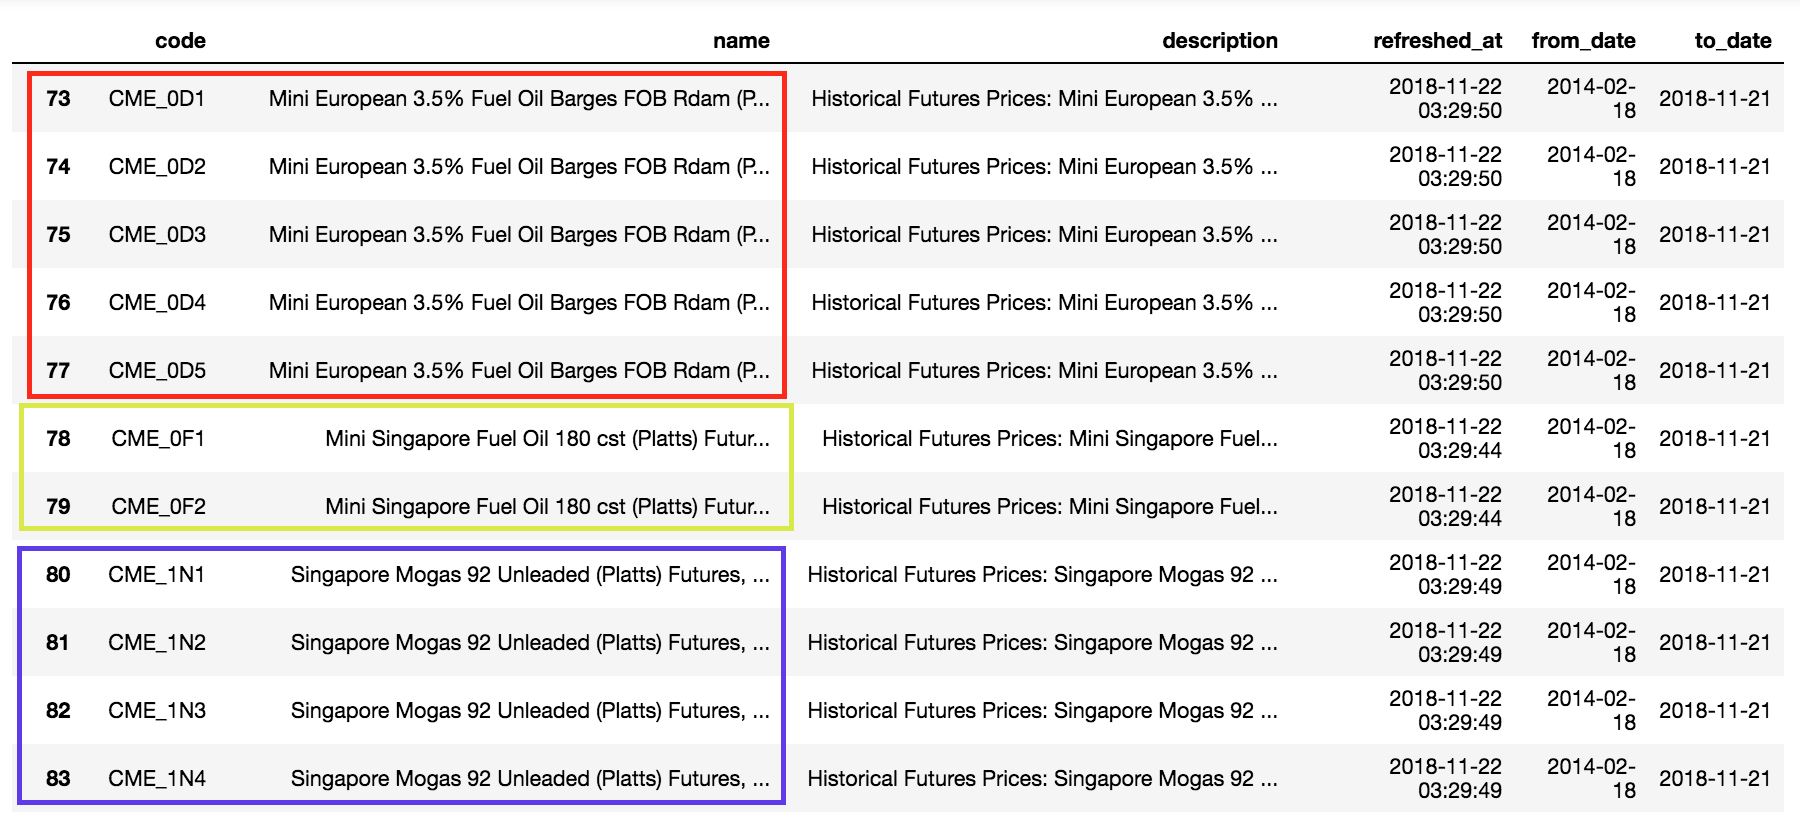</div>

### Applying market filter
- we choose CME (chicaco mercantile exchange)
- filter by desired market to get all CME 

### Filter futures using regular expression OR take them all
As we can see every future consists of multiple sub-codes 
We apply regex to only receive only one desired future (the first)

### Fetching data from Quandl & Save to .csv
Based on the code column we wrote a function that takes each code ID and makes a quandl request to get the whole timeseries data. Every series gets added as column to the dataframe.




In [ ]:
df_futures = fetch.fetch_chris_from_quandl()
df_futures.to_csv(path+"CME_commodities_all.csv")

### The plot below shows the distribution of futures per exchange market

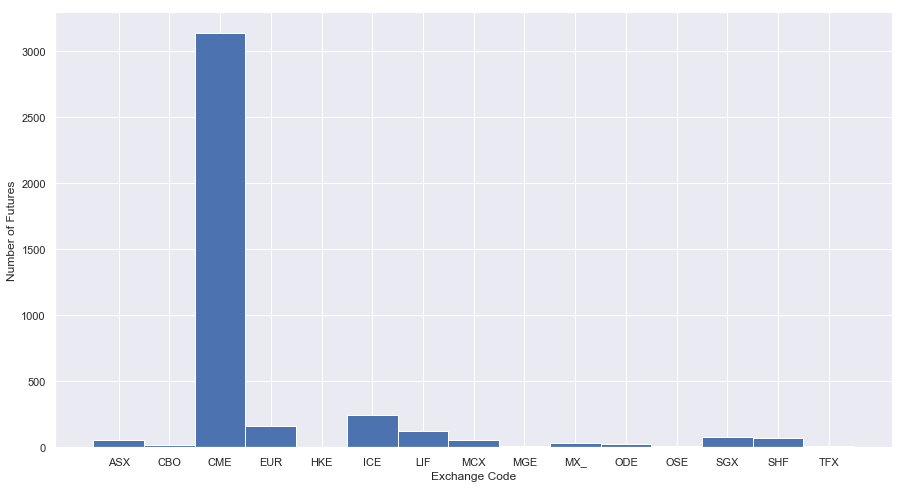

In [14]:
preprocess.exchange_counter()

### The plot below shows the available values we have for each Continuous Future Contract
We focus on the Last price and therefore only fetch this column.

In [15]:
preprocess.summarise_CME()

,CME Variables
0,Open
1,High
2,Low
3,Last
4,Change
5,Settle
6,Volume
7,Previous Day Open Interest


Number of Days in CME Dataset:  (15135,) 

Number of Futures in CME Dataset:  (3139,)


## Loading the raw data

After we scraped and build the dataset we stored it. Now it's time to do some cleaning and preprocessing.
- CME_futures_unique.csv: contains only the unique future contracts
- CME_futures_all.csv: contains all future contracts including the sub contracts

In [3]:
df_futures = pd.read_csv(path+"CME_futures_all.csv", index_col=0)
df_futures.iloc[:,:].head()

,CHRIS/CME_0D1 - Last,CHRIS/CME_0D2 - Last,CHRIS/CME_0D3 - Last,CHRIS/CME_0D4 - Last,CHRIS/CME_0D5 - Last,CHRIS/CME_0F1 - Last,CHRIS/CME_0F2 - Last,CHRIS/CME_1N1 - Last,CHRIS/CME_1N2 - Last,CHRIS/CME_1N3 - Last,...,CHRIS/CME_Z931 - Last,CHRIS/CME_Z932 - Last,CHRIS/CME_Z933 - Last,CHRIS/CME_Z934 - Last,CHRIS/CME_Z94 - Last,CHRIS/CME_Z95 - Last,CHRIS/CME_Z96 - Last,CHRIS/CME_Z97 - Last,CHRIS/CME_Z98 - Last,CHRIS/CME_Z99 - Last
Date,,,,,,,,,,,,,,,,,,,,,
1959-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Missing values
To get a basic understanding how the distribution of missing value looks like in our raw dataset we plot them. Her we can see that around 90 percent of the data is missing until the year 2014. From 2016 on we again need to deal with missing data until 2018.

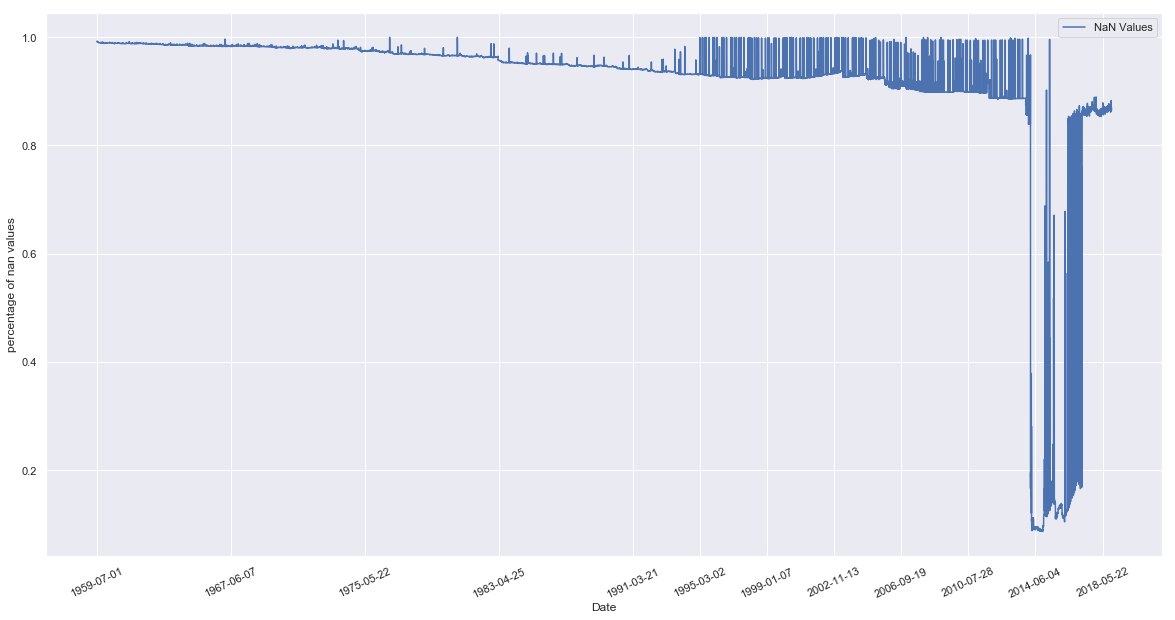

NaNs in df:  43279337


In [4]:
preprocess.missingValues(df_futures, 0, percentage=True)

## Clean and Export
###### *run only once
- renaming of filenames
- calculating price log returns
- remove only nan columns
- Selection onward from 2014 - 2018 
- save clean data to json



- old shape of the dataset = [15135 days, 3139 futures] 
- new shape of the dataset = [1208 days, 3091 futures]

In [6]:
df_futures = preprocess.clean(df_futures)
df_clean = preprocess.select_interval(df_futures, 13927)
df_clean.to_csv("./data_clean/CME_futures_all_clean.csv")
df_clean.head()

,CME_0D1-Last,CME_0D2-Last,CME_0D3-Last,CME_0D4-Last,CME_0D5-Last,CME_0F1-Last,CME_0F2-Last,CME_1N1-Last,CME_1N2-Last,CME_1N3-Last,...,CME_Z931-Last,CME_Z932-Last,CME_Z933-Last,CME_Z934-Last,CME_Z94-Last,CME_Z95-Last,CME_Z96-Last,CME_Z97-Last,CME_Z98-Last,CME_Z99-Last
Date,,,,,,,,,,,,,,,,,,,,,
2014-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-20,-5.430890,-2.051051,-1.693499,-1.621275,-1.563139,-1.986580,-1.768899,-7.848229,-5.811089,-5.854981,...,5.276902,6.490931,5.741098,5.741185,-0.990697,0.424361,-0.968574,-0.976275,-0.803222,-0.703637
2014-02-21,-2.279998,-2.117249,-2.609788,-3.021455,-3.203737,-2.103914,-2.439491,-1.773189,-1.741089,-1.781144,...,-1.540690,-1.528540,-1.550654,-1.550701,79.982099,-1.597484,21.322414,27.989227,1.146929,1.303754
2014-02-24,-1.912654,-3.161574,-3.092020,-2.941605,-2.857457,-1.749131,-2.192225,-0.892575,-1.402553,-1.450146,...,-0.413874,-0.434791,-0.464039,-0.464065,-2.030929,0.587327,-2.461652,-2.466956,-2.454227,-2.392334
2014-02-25,-3.541867,-3.474332,-3.036415,-2.828643,-2.777036,-5.261511,-3.558444,0.212464,-3.110654,-3.269717,...,-1.358143,-1.334239,-1.250659,-1.375978,-1.299647,-2.004009,-1.195032,-1.189034,-1.492762,-1.787388


# Analysis

In [7]:
df = pd.read_csv("./data_clean/CME_futures_all_clean.csv")
df.set_index('Date', inplace=True)

### Future Preselection V1 - Biggest full Frame

To get a basic understanding about what is in our data we made a plot that shows the biggest full frame for every continuous future contract we have in our dataset. The scatterplot below therefore depicts around 3000 dots representing the size of one future matrix with the shape [x_days, y_futures].

*Attention to lookahead-bias

In [9]:
df_biggest_frames=analysis.biggest_frames(df_clean)

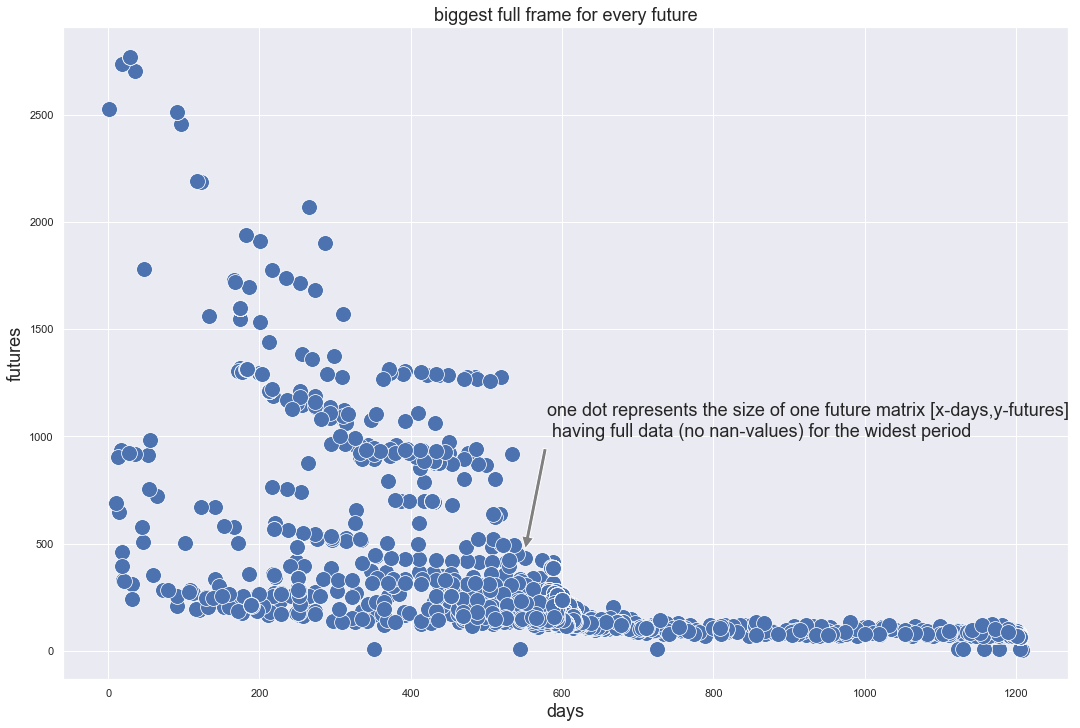

In [10]:
analysis.scatter_plot_biggest_frames(df_biggest_frames)

# Louvain Clusterin Algorithm
## Louvain Algorithm I: Cosine Similarity

In [8]:
similarities=cluster.cos_similarities(df)

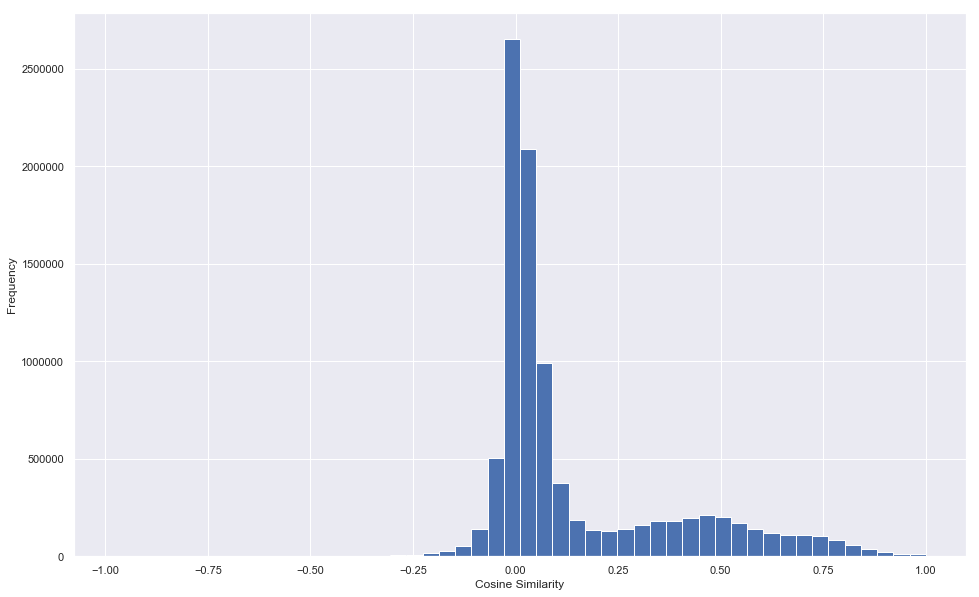

In [9]:
cluster.plot_cos_similarity(similarities)

## Louvain Algorithm II: Community Detection
### Attempt 1: Without Thresholds - call this cosine similarity without thresholds


<div class="alert alert-warning">
<b>Attention</b> This line of code below may lead to a Memory Error. In this case, re-start the kernel and run the script without this line
</div>

In [ ]:
louv_no_thresh=cluster.louvain_without_threshold(similarities)

### Attempt 2: With Threshold - Exam Procedure as Above but with Threshold

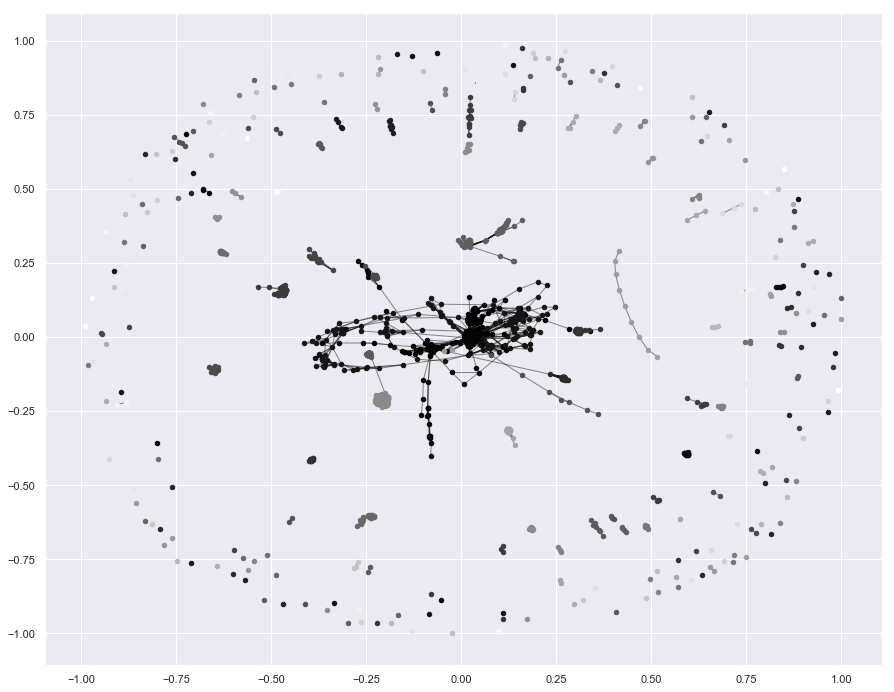

In [17]:
louv_with_thresh=cluster.louvain_with_threshold(similarities)

## Portfolio Construction / Dimension Reduction

#### The aim of this section is to construct our portfolio through dimension reduction - making use of Louvain's Algorithm output

- As a first step, the cell below groups all futures belonging to the same communities together

In [10]:
selections=constructport.regroup_communities(similarities)

#### To construct the portfolio, the following methodology was employed: 

- For each futures in a community, sum over the futures contract cosine similarities with each of the other futures contracts
- For each community, the futures contract that has the highest cosine similiarity with the other futures is the one that is 'most popular' and is therefore the one that is chosen to represent the respective community in the portfolio

In [11]:
portfolio=constructport.portfolio(selections,similarities,df)

In [12]:
representatives=constructport.port_ret_reps(selections,similarities,df)

In [13]:
print("Number of futures in our portfolio is: ", portfolio.shape[-1], " vs. an initial number of futures of ", df.shape[-1])

Number of futures in our portfolio is:  269  vs. an initial number of futures of  3091


# Applying Random Forest on financial time series
### on continuous future contracts

First we load the filtered clusters and the price returns which satisfy the needs of the random forest algorithm.

In [3]:
returns = learn.get_rf_df_returns()
clusters = learn.get_clusters()

### Assets we want to predict for
Each line below represents one of our selected future-asset that we want to predict price returns for. The representative asset has a specific and individual amount of childs which we received from the previous louvain clustering step. We use the representatives children to act as the feature matrix which we need to feed the random forest algorithm. The index number is just a numerical representation of the representative asset.

In [4]:
learn.show_cluster_stats(returns, clusters)

index: 504 representative asset: CME_CY10 : has nr of childs: 286
index: 945 representative asset: CME_FO11 : has nr of childs: 37
index: 2629 representative asset: CME_S6 : has nr of childs: 56
index: 2198 representative asset: CME_NP17 : has nr of childs: 67
index: 2726 representative asset: CME_TY1 : has nr of childs: 109
index: 1354 representative asset: CME_HP14 : has nr of childs: 159


The function below runs the random forest algorithm on the dictionary of clusters we pass as parameter. The third parameter defines how many estimators or the number of decision trees the algorithm uses to deceide on the output.

<div class="alert alert-warning">
<b>Attention</b> The line of code below takes around one hour to run - depending on the number of estimators.
</div>

In [ ]:
learn.run_rf_on_selected_clusters(returns, clusters, 100)

## The Random Forest results we got
In the figure below we can see the results from our Random Forest algorithm, which we received by applying the Random forest on each of our preselected cluster representatives. The plot shows the original price returns, the blue line, in contrast to the values we predicted in orange. The orange line either follows the original value or goes exactly in the opposite direction. We did that by taking the indication sign of the raw predicted value and multiplied it by the real value of the asset at the calculcated position (daytime). The more orange we see the better our prediction. 

### Measuting the results
To talk in numbers, we calculated the accuracy Score as well as the F1 score to measure the accuracy on each predicted future representative.

Calculating any accuracy-score, we need to pass the prediction labels to the desired function, which in our case is the accuracy_score or f1_score function provided by the sklearn.metrics library. The parameters we pass to those functions are the sign values of the original and the predicted values that need to be compared. 

For one asset the accuracy score is below 50 percent, which is a bad result (coin-flip). For the other 5 assets we predicted values for we reached a score higher than 50 percent up to 53 which is good on the other hand.

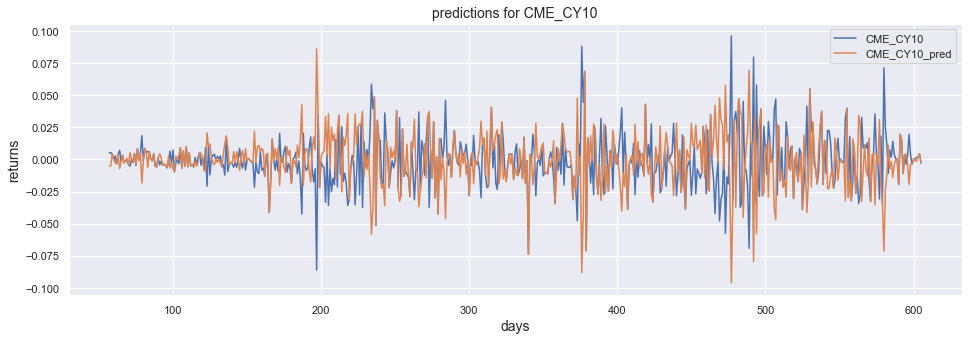

Accuracy Score          0.46083788706739526
F1 Score (avg=macro)    0.6375861760229206
F1 Score (avg=micro)    0.46083788706739526
F1 Score (avg=weighted) 0.4628472543295333
F1 Score (avg=none)     [0.49315068 1.         0.41960784]


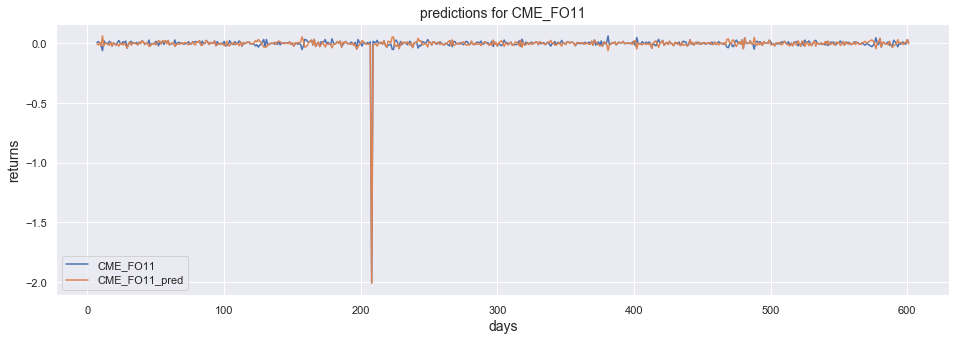

Accuracy Score          0.5226890756302521
F1 Score (avg=macro)    0.679064751502914
F1 Score (avg=micro)    0.5226890756302521
F1 Score (avg=weighted) 0.521320073162577
F1 Score (avg=none)     [0.53896104 1.         0.49823322]


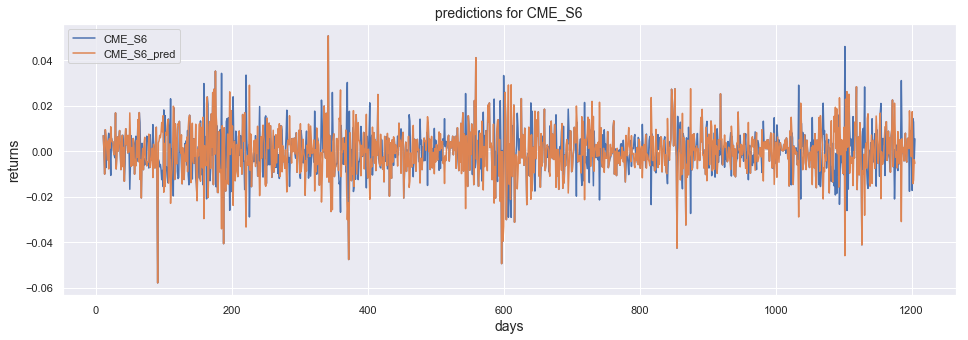

Accuracy Score          0.5087866108786611
F1 Score (avg=macro)    0.6683213250291559
F1 Score (avg=micro)    0.5087866108786611
F1 Score (avg=weighted) 0.5087453303968106
F1 Score (avg=none)     [0.49700086 1.         0.50796312]


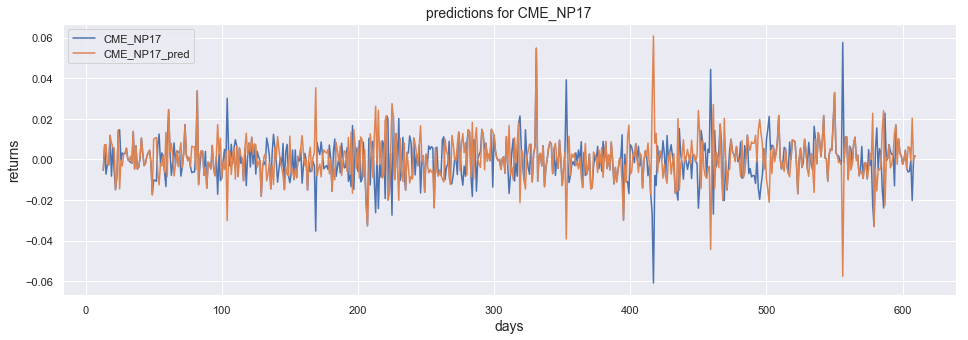

Accuracy Score          0.509212730318258
F1 Score (avg=macro)    0.6685065921875554
F1 Score (avg=micro)    0.509212730318258
F1 Score (avg=weighted) 0.5087680474826353
F1 Score (avg=none)     [0.48506151 1.         0.52045827]


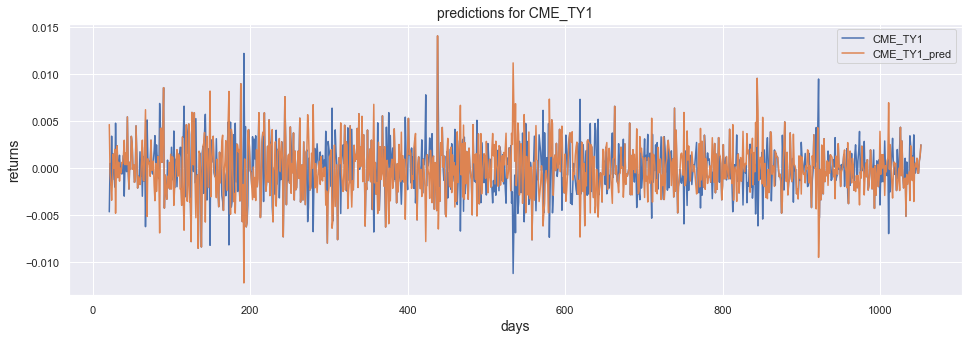

Accuracy Score          0.5145348837209303
F1 Score (avg=macro)    0.6698673151959994
F1 Score (avg=micro)    0.5145348837209303
F1 Score (avg=weighted) 0.5145107018583323
F1 Score (avg=none)     [0.51311953 1.         0.49648241]


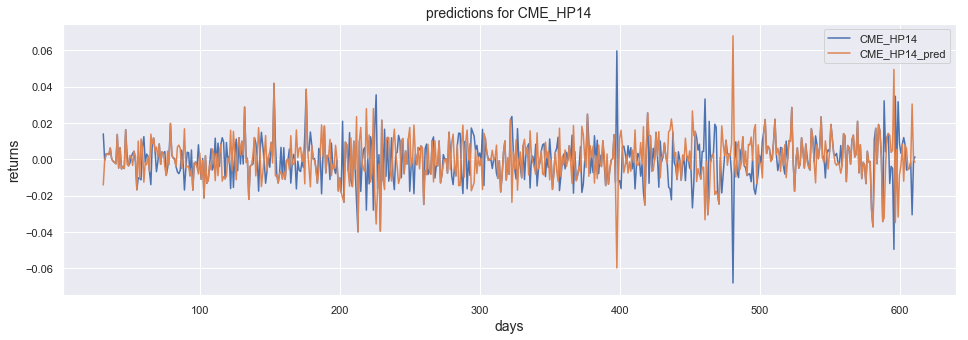

Accuracy Score          0.5301204819277109
F1 Score (avg=macro)    0.684026825408786
F1 Score (avg=micro)    0.5301204819277109
F1 Score (avg=weighted) 0.5301049030724662
F1 Score (avg=none)     [0.52686308 1.         0.52521739]


In [5]:
learn.show_rf_result_stats(returns)

### Density of continuous future contracts
The problem we encounter here is that for most of the continuous future contracts, data is not very dense. Meaning that we miss out many values in between the timeseries. In the example above we have the future CME_CY10 which represents Brent Financial Futures. We can clearly see that the data is getting very sparse onwards from day 550 till the end but also inbetween we obtain missing values. Most of the assets are shaped like that and this affects the result of our predictions in a negative way because also the feature matrix is getting smaller and less qualitative for further calculations towards the end.

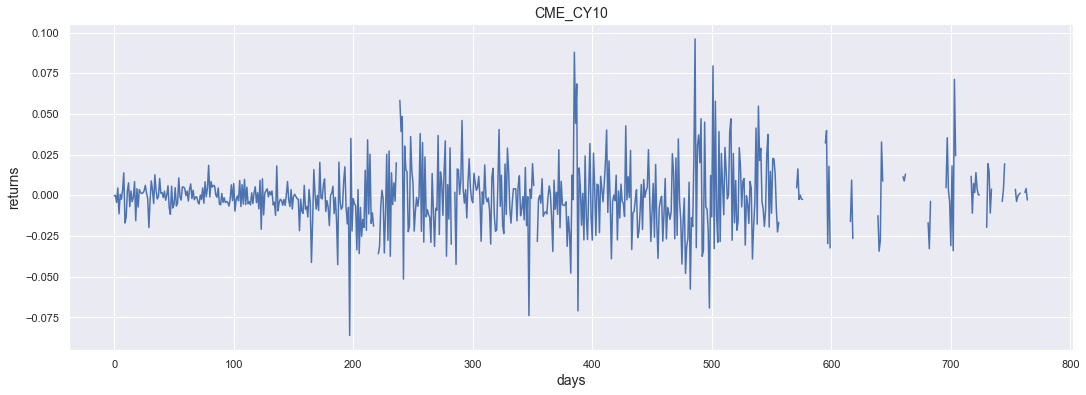

In [6]:
learn.plot_single_future(returns, "CME_CY10")

## Lessons learned

Beside the big challenges we encountered, we made the most out of our project and learned a lot in terms of data fetching from remote sources, data cleaning  wrangling, analysis and how to apply various methods such as machine learning and clustering methods on time series data. We developed a good sense of how financial time series behave and build a solid library of functions that will help us with problems we solved once during this project.

Although we expected the results to be better, we were satisfied that our initial idea, our strategy, in general worked out as we wanted. We knew it would have been a hard time getting some good results as the data varies that much in terms of different assets among the futures and in terms of sparsity of the data.